## Unsupervised Learning: Segmentation and Clustering of US Used Car Sales Data 
###### Pletcher, Dominic

## Dataset: 
    
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

#### Description: 

Creator: Austin Reese

This dataset contains over 400,000 samples of used car sales within the US in 2021. There are a variety of columns that detail information on each sale such as price, model, year and condition, amongst others. The creator collected the data via web scraping of Craigslist databases.


## Abstract:

This research study employs unsupervised machine learning techniques to analyze a substantial dataset of US car sales from 2021. The dataset is carefully preprocessed, resulting in a refined set of 17 key parameters. A 10% subsample of the data is used for segmentation and clustering, utilizing various clustering algorithms and dimensionality reduction techniques. The t-SNE reduced MiniBatch K-Means algorithm demonstrates the most promising results, producing a Silhouette score of 0.39, indicating effective data segmentation. The model identifies three distinct clusters, revealing insights into the US car market segments based on year, price, odometer, and condition. However, due to computational limitations, the full dataset remains unexplored.

This study contributes to understanding US car sales data, particularly in the context of used cars' condition and values, enabling strategic decision-making in the automotive industry. It highlights the potential of unsupervised learning methods in deriving valuable insights from large-scale datasets and paves the way for future research in this area. The segmented clusters generated by the unsupervised learning algorithm can enhance future prediction and classification models, showcasing the significance of this approach.

## Research Question:

Can the application of unsupervised machine learning techniques identify distinct patterns or trends in the pricing and demand of various types of used cars in the 2021 market?

In [47]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy import stats

# display dataframe
vehicles_df = pd.read_csv('vehicles.csv')
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [48]:
vehicles_df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [49]:
vehicles_df.shape

(426880, 26)

#### INSIGHT:

1. The dataframe contains 26 variables and 426,880 samples related to individual used car sales in 2021.
2. Null values exist in many columns.
3. Data Types include numeric and non-numeric.

# Data Cleaning

In [50]:
# get unique values to visualize potential categorical/
# continuous variables

vehicles_df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

The high range of unique value counts amongst the variables indicate the presence of of both categorical and continuous variables.

In [51]:
# calculate percentages of missing values to begin data cleaning

missing = vehicles_df.isna().sum() * 100 / len(vehicles_df)
print(missing)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [52]:
# drop unnecessary columns (read description below output)

vehicles_df = vehicles_df.drop(['county', 'size', 'VIN', 'url', 'region_url',
                               'image_url', 'id', 'description', 'posting_date'], axis=1)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usage

#### INSIGHT

Upon careful analysis of the dataset, certain columns have been deemed unnecessary for the intended modeling task and will be excluded from further processing. The rationale behind this decision is as follows:

1. county: This column has been removed due to the presence of 100% missing values, which provides no substantial information.

2. size: Given the ambiguity of its unique values and the more descriptive and accurate type variable, the size column will not be included.

3. VIN: This is essentially the car's identification number. Due to confidentiality considerations, it will be omitted.

4. url, region_url, and image_url: These URL credentials are not critical for our model and require a distinct method of analysis; hence, they will be omitted.

5. id: The index number essentially serves the purpose of identification, making this column redundant.

6. description: This dataset will not require a language model, rendering the description field superfluous.

7. posting_date: The dataset only covers a one-month period (04/2021 - 05/2021), negating the need for a time series analysis. Therefore, posting_date will be dropped.

In [53]:
# Calculate missing percentage for each column
missing = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100

# Calculate unique counts for each column
unique_counts = vehicles_df.nunique()

# Create a new dataframe with variable name, missing percentage, unique counts, and data type
summary_df = pd.DataFrame({
    'Variable Name': vehicles_df.columns,
    'Missing Percentage': missing,
    'Unique Counts': unique_counts,
    'Data Type': vehicles_df.dtypes
})

# Styling the dataframe
styled_summary_df = summary_df.style.background_gradient()

# Display styled dataframe
styled_summary_df

,Variable Name,Missing Percentage,Unique Counts,Data Type
region,region,0.000000,404,object
price,price,0.000000,15655,int64
year,year,0.282281,114,float64
manufacturer,manufacturer,4.133714,42,object
model,model,1.236179,29667,object
condition,condition,40.785232,6,object
cylinders,cylinders,41.622470,8,object
fuel,fuel,0.705819,5,object
odometer,odometer,1.030735,104870,float64
title_status,title_status,1.930753,6,object


In [54]:
# drop null rows 

vehicles_df = vehicles_df.dropna()
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

#### INSIGHT:

#### The decision to discard rows containing null values was executed for several reasons: 

1. Retention of substantial data: Post-elimination of rows with null values, the dataset still boasts a robust sample size of 115,435 non-null data points, which is adequate for the analysis.

2. Essential nature of certain variables: The columns that exhibit the highest count of missing values after the initial cleanup are integral to our analysis and predominantly categorical.

3. Impact on distribution: Introducing a new 'Unknown' category to account for these missing values in these essential columns could significantly skew their distributions, potentially impacting the accuracy of subsequent analysis.

By taking these factors into account, the strategy of dropping rows with null values facilitates a cleaner and more reliable dataset for future steps.

In [55]:
vehicles_df.nunique()

region            403
price            5215
year              102
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
odometer        37514
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
lat             31481
long            31768
dtype: int64

## Exploratory Data Analysis 

For exploratory analysis purposes, potential categorical variables are plotted via histograms.

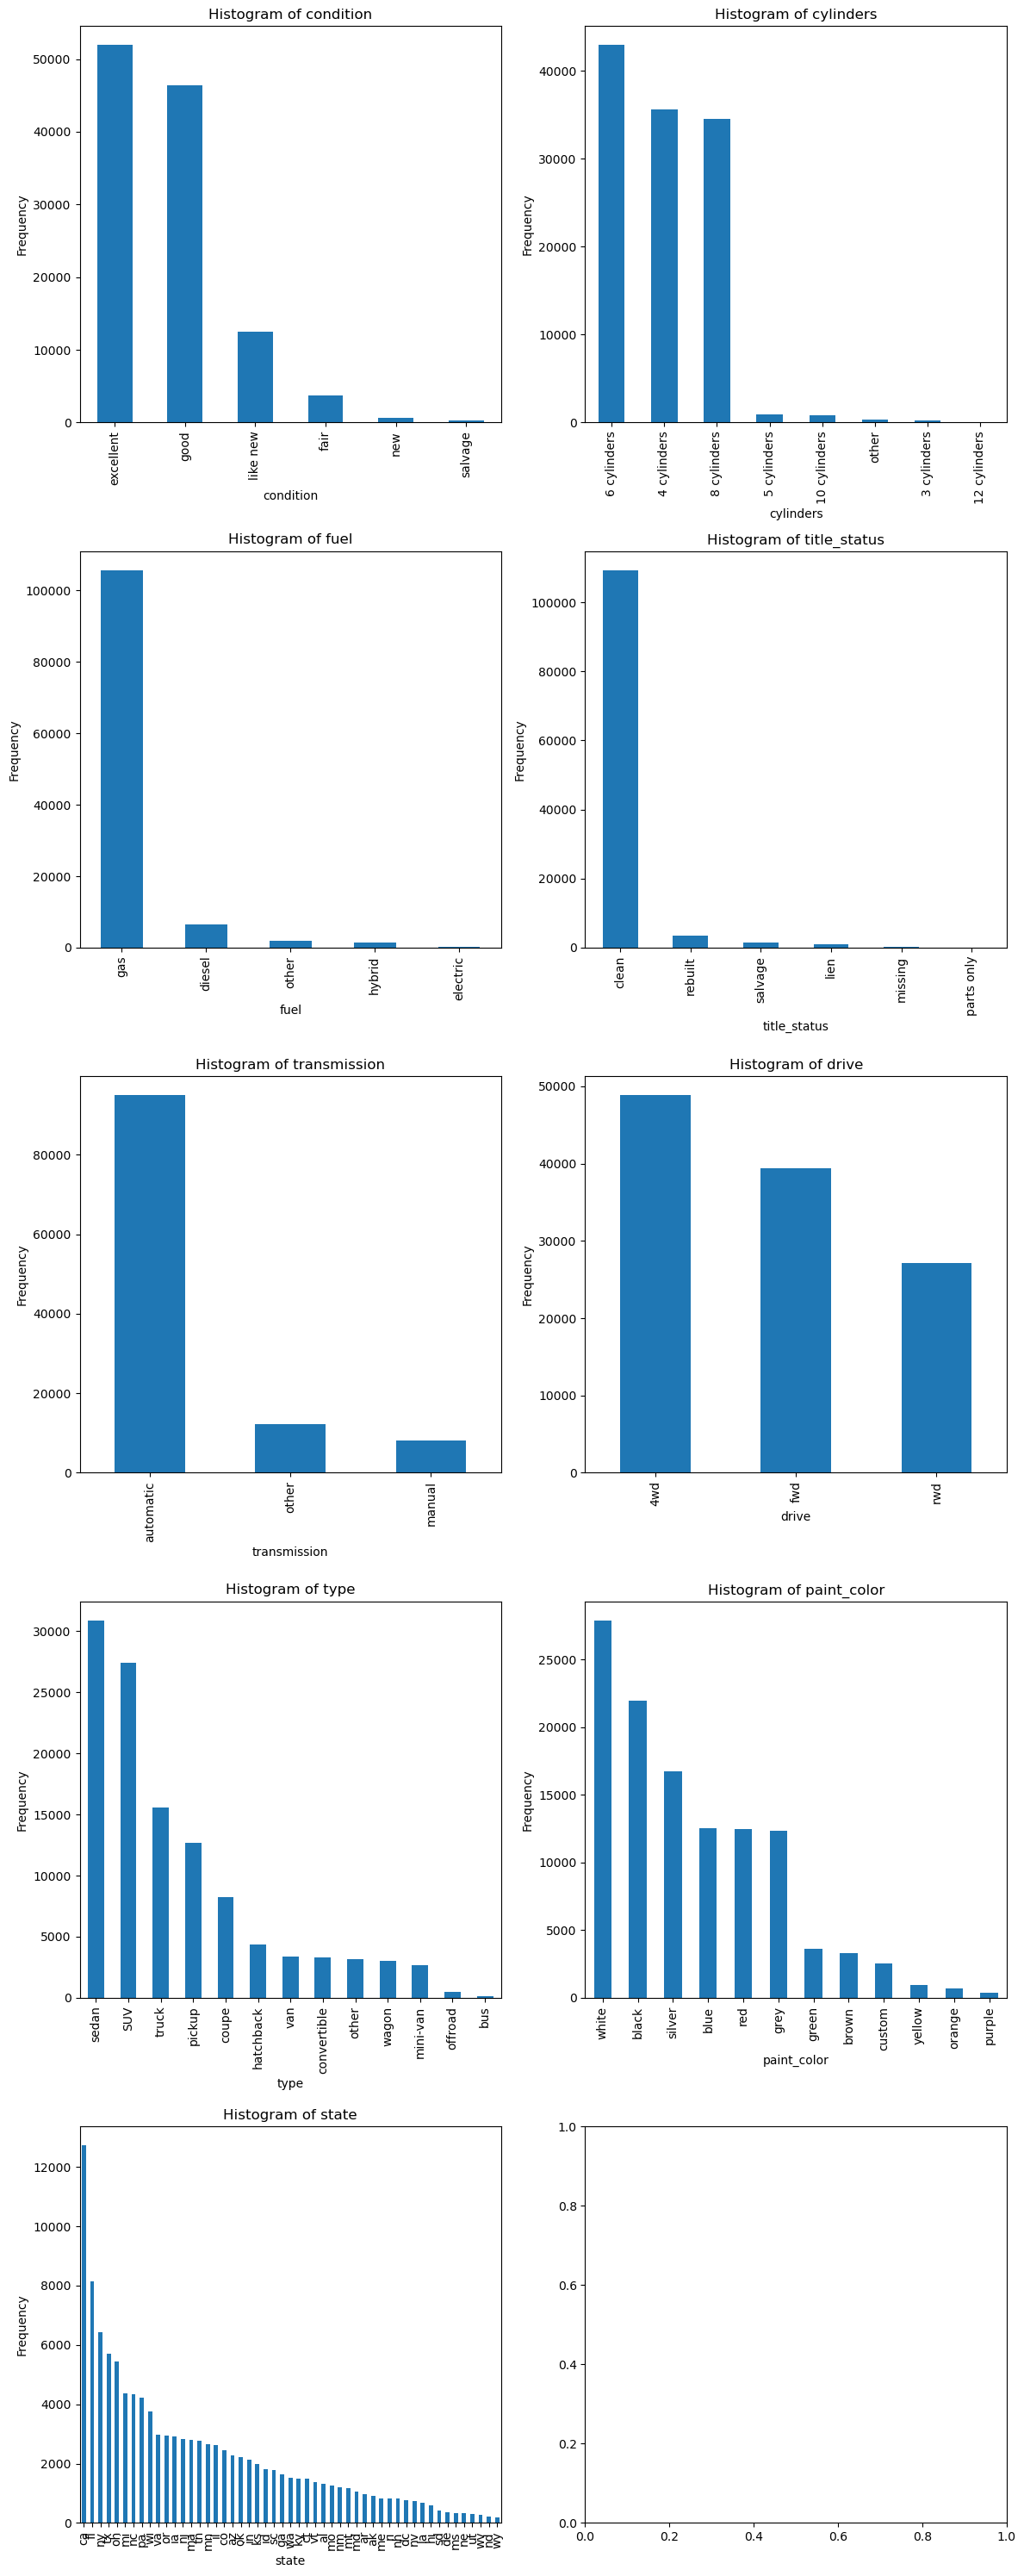

In [56]:
cat_sample = vehicles_df[['condition', 'cylinders', 'fuel', 'title_status',
                    'transmission', 'drive', 'type','paint_color', 'state']]

import matplotlib.pyplot as plt

num_cols = len(cat_sample.columns)
rows = num_cols // 2 + num_cols % 2

fig, axes = plt.subplots(rows, 2, figsize=(12, 6*rows))

for i, column in enumerate(cat_sample.columns):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    cat_sample[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

One column is missing from the categorical variables subset - YEAR. To visualize this variable in particular, a histogram is generated with a cut off of 1940 ONLY for visualization purposes. This cut-off will not be implemented into the model.

count    115215.00000
mean       2009.69274
std           8.99559
min        1941.00000
25%        2006.00000
50%        2012.00000
75%        2015.00000
max        2022.00000
Name: year, dtype: float64


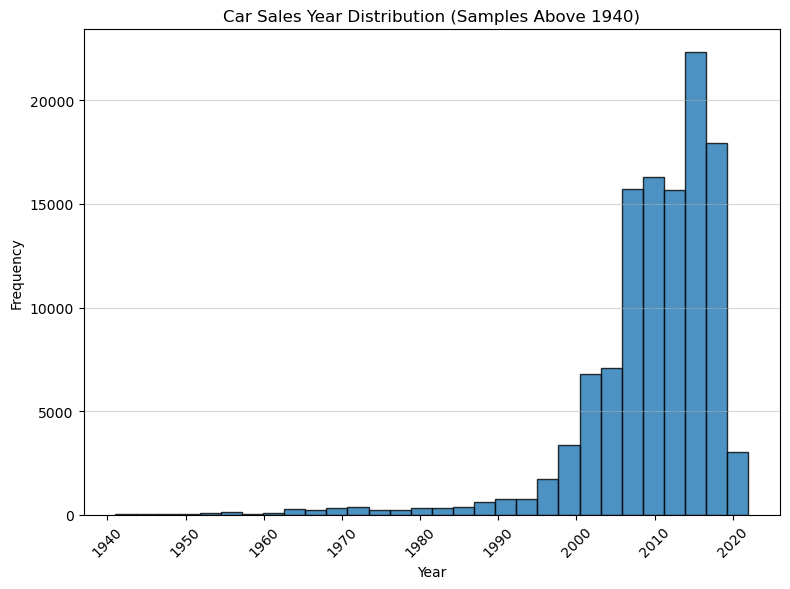

In [57]:
# Filter the samples above 1940
year_data = vehicles_df[vehicles_df['year'] > 1940]['year']

# Generate descriptive statistics
statistics = year_data.describe()

# Print the statistics
print(statistics)

# Generate the histogram plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(year_data, bins=30, edgecolor='black', alpha=0.8)
plt.title('Car Sales Year Distribution (Samples Above 1940)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


#### INSIGHT:

1. Skewness in categorical variables necessitates normalization and outlier analysis.
2. Treating the 'year' variable as a categorical variable improves modeling accuracy and scientific rigor.
3. Considering 'year' as categorical contributes to comprehensive analysis and robust data representation.

### Outliers and Transformations

In [58]:
vehicles_df.nunique()

region            403
price            5215
year              102
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
odometer        37514
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
lat             31481
long            31768
dtype: int64

In [59]:
# separate object columns into new dataframe 'vehicle_obj'
# to separate non-numeric variables (objects)

vehicle_obj = vehicles_df.select_dtypes(include=['object'])
vehicle_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        115435 non-null  object
 1   manufacturer  115435 non-null  object
 2   model         115435 non-null  object
 3   condition     115435 non-null  object
 4   cylinders     115435 non-null  object
 5   fuel          115435 non-null  object
 6   title_status  115435 non-null  object
 7   transmission  115435 non-null  object
 8   drive         115435 non-null  object
 9   type          115435 non-null  object
 10  paint_color   115435 non-null  object
 11  state         115435 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [60]:
vehicle_obj.nunique()

region            403
manufacturer       41
model           11483
condition           6
cylinders           8
fuel                5
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
dtype: int64

The object columns were extracted from the dataframe. All columns appear to be categorical, with one abnormality - the model variable. It has a very high count of unique values (11,483). All of these values are strings that represent the models of cars. The count of unique values is nearly 10% of all samples, indicating that itcan be grouped into categories for further analysis. For now, the variable values will remain intact.

In [61]:
# separate numeric columns
vehicles_numeric = vehicles_df.select_dtypes(include=['int64', 'float64'])
vehicles_numeric.info()

# print unique value counts 
print('\nUnique Value Counts of Numeric:')
vehicles_numeric.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   year      115435 non-null  float64
 2   odometer  115435 non-null  float64
 3   lat       115435 non-null  float64
 4   long      115435 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 5.3 MB

Unique Value Counts of Numeric:


price        5215
year          102
odometer    37514
lat         31481
long        31768
dtype: int64

In [62]:
# drop year variable due to categorical nature
vehicles_numeric = vehicles_numeric.drop('year', axis=1)
vehicles_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   odometer  115435 non-null  float64
 2   lat       115435 non-null  float64
 3   long      115435 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.4 MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     115435 non-null  int64  
 1   odometer  115435 non-null  float64
 2   lat       115435 non-null  float64
 3   long      115435 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 4.4 MB


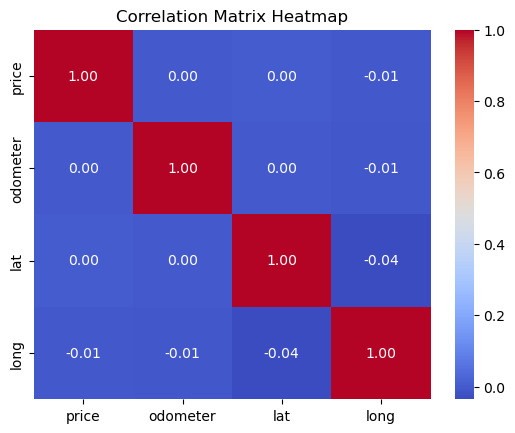

In [63]:
import seaborn as sns

vehicles_numeric.info()
corr_mat = vehicles_non_obj.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt='.2f')  # generate heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

In [64]:
corr_mat

,price,odometer,lat,long
price,1.000000,0.000691,0.003347,-0.006805
odometer,0.000691,1.000000,0.000623,-0.009288
lat,0.003347,0.000623,1.000000,-0.035616
long,-0.006805,-0.009288,-0.035616,1.000000


### Outlier Analysis

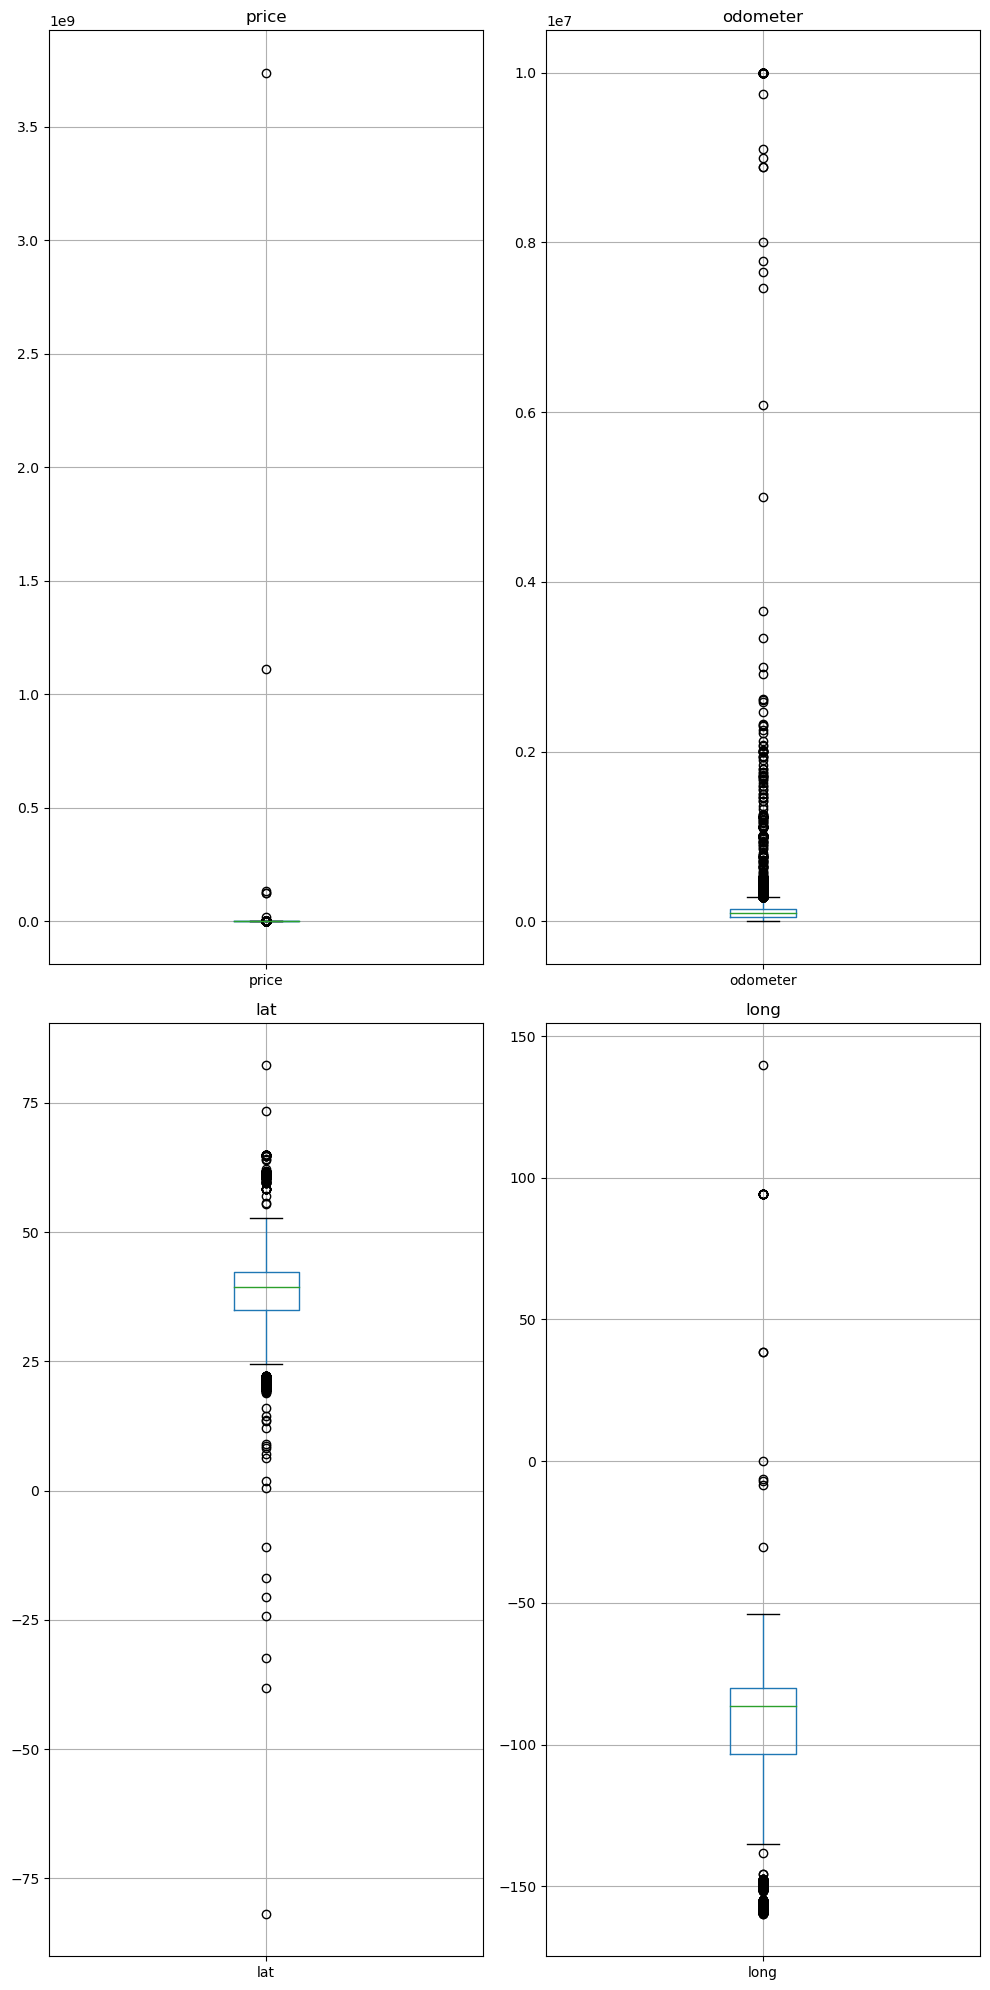

In [65]:
import seaborn as sns

num_columns = 2
num_rows = (len(vehicles_numeric.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))

for i, column in enumerate(vehicles_numeric.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    vehicles_numeric.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### IQR Identification

In [66]:
# assess IQR percentiles and count of outliers for columns

for column in vehicles_non_obj.columns:
    q75, q25 = np.percentile(vehicles_numeric[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((vehicles_numeric[column] > max_val) | (vehicles_numeric[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 2220

Column: odometer
The score threshold is: 1.5
Number of outliers is: 1095

Column: lat
The score threshold is: 1.5
Number of outliers is: 1515

Column: long
The score threshold is: 1.5
Number of outliers is: 1501



#### INSIGHT:

Visual inspection and IQR identification of continous variables display the presence of outliers. These outliers must be transformed.

### Log transformation

In [67]:
# Apply log transformation to each column
log_transform = vehicles_numeric.apply(np.log)
for column in log_transform.columns:
    q75, q25 = np.percentile(log_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((log_transform[column] > max_val) | (log_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 6224

Column: odometer
The score threshold is: 1.5
Number of outliers is: 6461

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



### Square-root transformation

In [68]:
# Apply sqrt transformation to each column

sqrt_transform = vehicles_numeric.apply(np.sqrt)
for column in sqrt_transform.columns:
    q75, q25 = np.percentile(sqrt_transform[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((sqrt_transform[column] > max_val) | (sqrt_transform[column] < min_val))[0]))
    ))

Column: price
The score threshold is: 1.5
Number of outliers is: 429

Column: odometer
The score threshold is: 1.5
Number of outliers is: 1427

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 0



### Winsorization

In [69]:
from scipy.stats import mstats

# Apply winsorization to each column
winsorized_numeric = vehicles_numeric.apply(lambda x: mstats.winsorize(x, limits=[0.01, 0.01]))

for column in winsorized_numeric.columns:
    q75, q25 = np.percentile(winsorized_numeric[column], [75, 25])
    iqr = q75 - q25
    threshold = 1.5
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    
    print("Column: {}".format(column))
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}\n".format(
        len((np.where((winsorized_numeric[column] > max_val) | (winsorized_numeric[column] < min_val))[0]))
    ))


Column: price
The score threshold is: 1.5
Number of outliers is: 2220

Column: odometer
The score threshold is: 1.5
Number of outliers is: 0

Column: lat
The score threshold is: 1.5
Number of outliers is: 0

Column: long
The score threshold is: 1.5
Number of outliers is: 1481



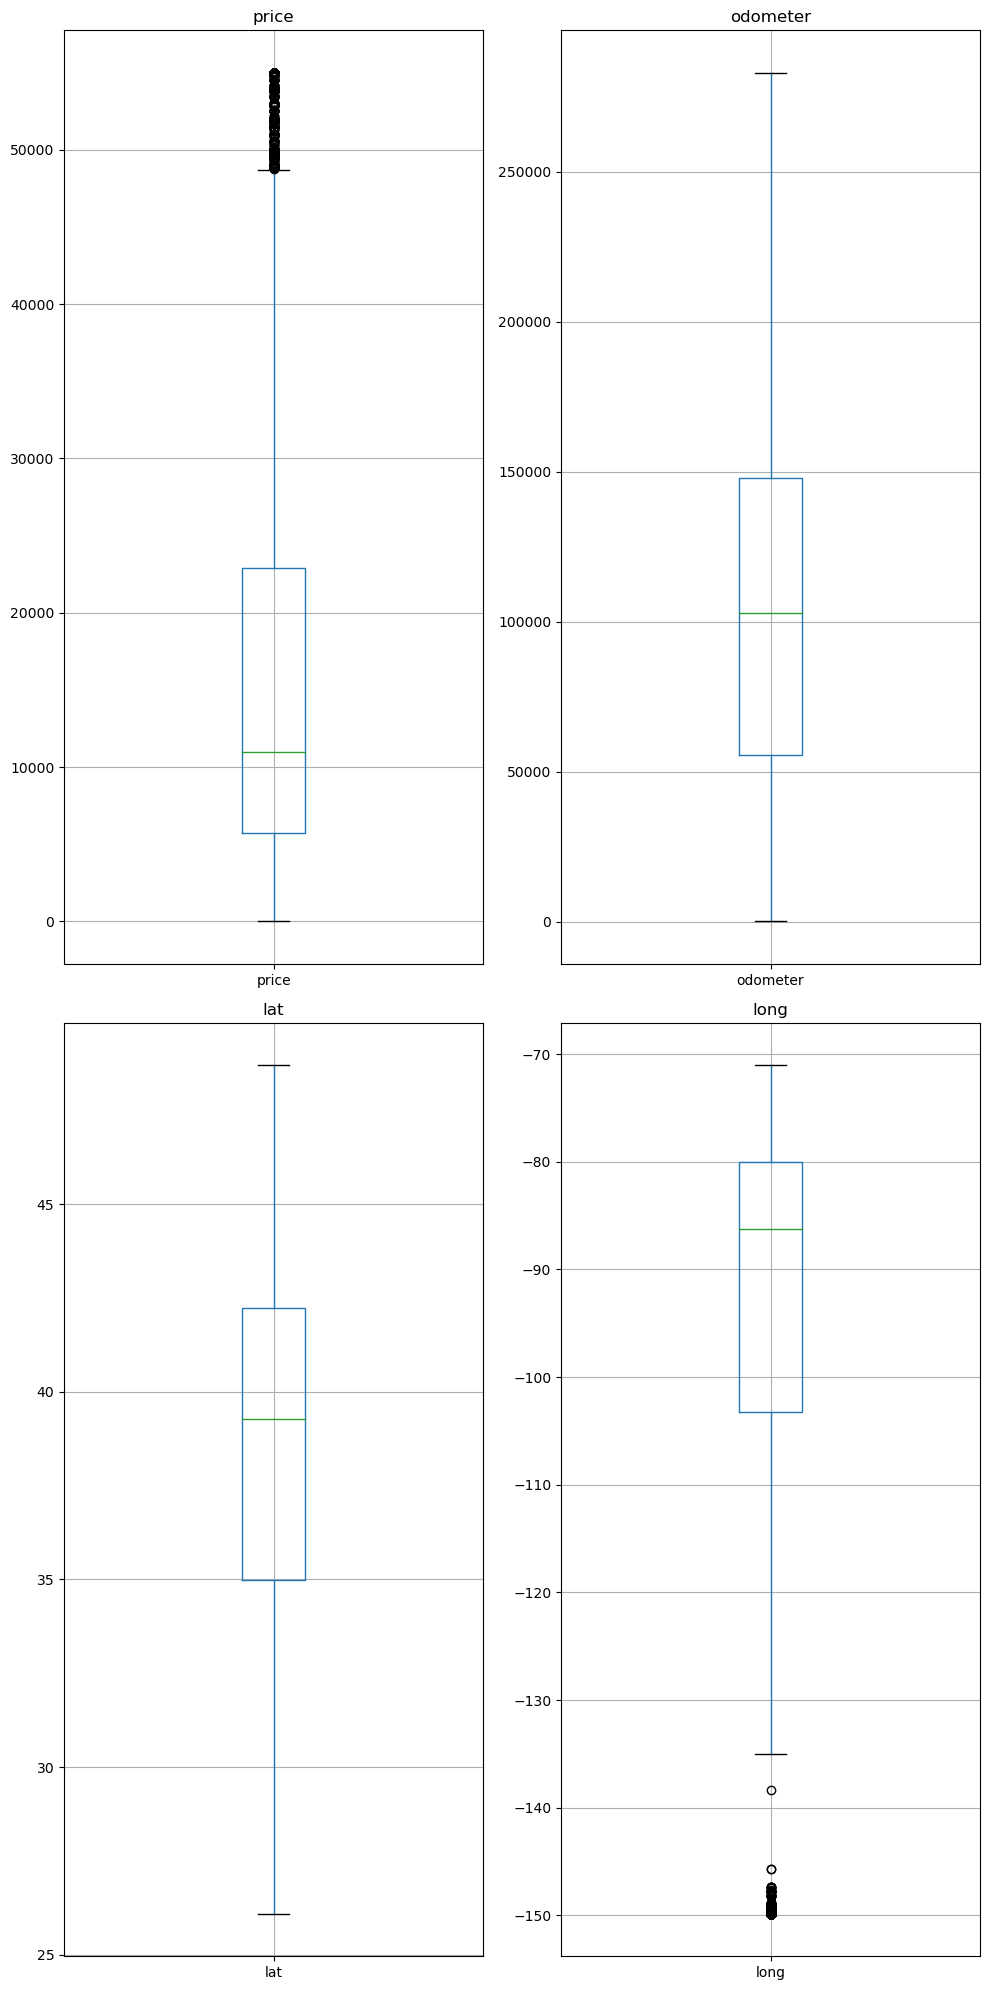

In [70]:
num_columns = 2
num_rows = (len(winsorized_numeric.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 20))

for i, column in enumerate(winsorized_numeric.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    winsorized_numeric.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

#### INSIGHT:

The boxplots above show that, for all variables, winsorization was most successful at normalizing the data. While square root transformation decreased the count of outliers for some variables, the boxplots more closely reveal normality for winsorization. Additionally, parameters were set to 0.01 for winsorization, which encompasses a larger count of samples than the traditional 0.05.

In [71]:
# update the original DataFrame with the new values
vehicles_df.update(winsorized_numeric)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115435 non-null  object 
 1   price         115435 non-null  int64  
 2   year          115435 non-null  float64
 3   manufacturer  115435 non-null  object 
 4   model         115435 non-null  object 
 5   condition     115435 non-null  object 
 6   cylinders     115435 non-null  object 
 7   fuel          115435 non-null  object 
 8   odometer      115435 non-null  float64
 9   title_status  115435 non-null  object 
 10  transmission  115435 non-null  object 
 11  drive         115435 non-null  object 
 12  type          115435 non-null  object 
 13  paint_color   115435 non-null  object 
 14  state         115435 non-null  object 
 15  lat           115435 non-null  float64
 16  long          115435 non-null  float64
dtypes: float64(4), int64(1), object(12)
memory usag

### Encode non-numeric categorical variables

In [72]:
# isolate object columns
categorical_str = vehicles_df.select_dtypes(include=['object'])
categorical_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115435 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        115435 non-null  object
 1   manufacturer  115435 non-null  object
 2   model         115435 non-null  object
 3   condition     115435 non-null  object
 4   cylinders     115435 non-null  object
 5   fuel          115435 non-null  object
 6   title_status  115435 non-null  object
 7   transmission  115435 non-null  object
 8   drive         115435 non-null  object
 9   type          115435 non-null  object
 10  paint_color   115435 non-null  object
 11  state         115435 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [73]:
# Sample 10% of your DataFrame
sample_df = vehicles_df.sample(frac=0.1, random_state=42)

# Create a copy of df to preserve the cleaned dataframe
# before encoding
df_factorized = sample_df.copy()

# Iterate over each column in the dataframe
for column in df_factorized.columns:
    # Check if the column's dtype is 'object'
    if df_factorized[column].dtype == 'object' or 'category':
        df_factorized[column] = pd.factorize(df_factorized[column])[0]

df_factorized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11544 entries, 374904 to 308384
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   region        11544 non-null  int64
 1   price         11544 non-null  int64
 2   year          11544 non-null  int64
 3   manufacturer  11544 non-null  int64
 4   model         11544 non-null  int64
 5   condition     11544 non-null  int64
 6   cylinders     11544 non-null  int64
 7   fuel          11544 non-null  int64
 8   odometer      11544 non-null  int64
 9   title_status  11544 non-null  int64
 10  transmission  11544 non-null  int64
 11  drive         11544 non-null  int64
 12  type          11544 non-null  int64
 13  paint_color   11544 non-null  int64
 14  state         11544 non-null  int64
 15  lat           11544 non-null  int64
 16  long          11544 non-null  int64
dtypes: int64(17)
memory usage: 1.6 MB


#### INSIGHT:

A subsample of 10% was taken from the updated dataframe due to computational limitations. This proves to be a limitation to the study and must be addressed in the future. As for now, a sample count of 11,544 will suffice for the model.

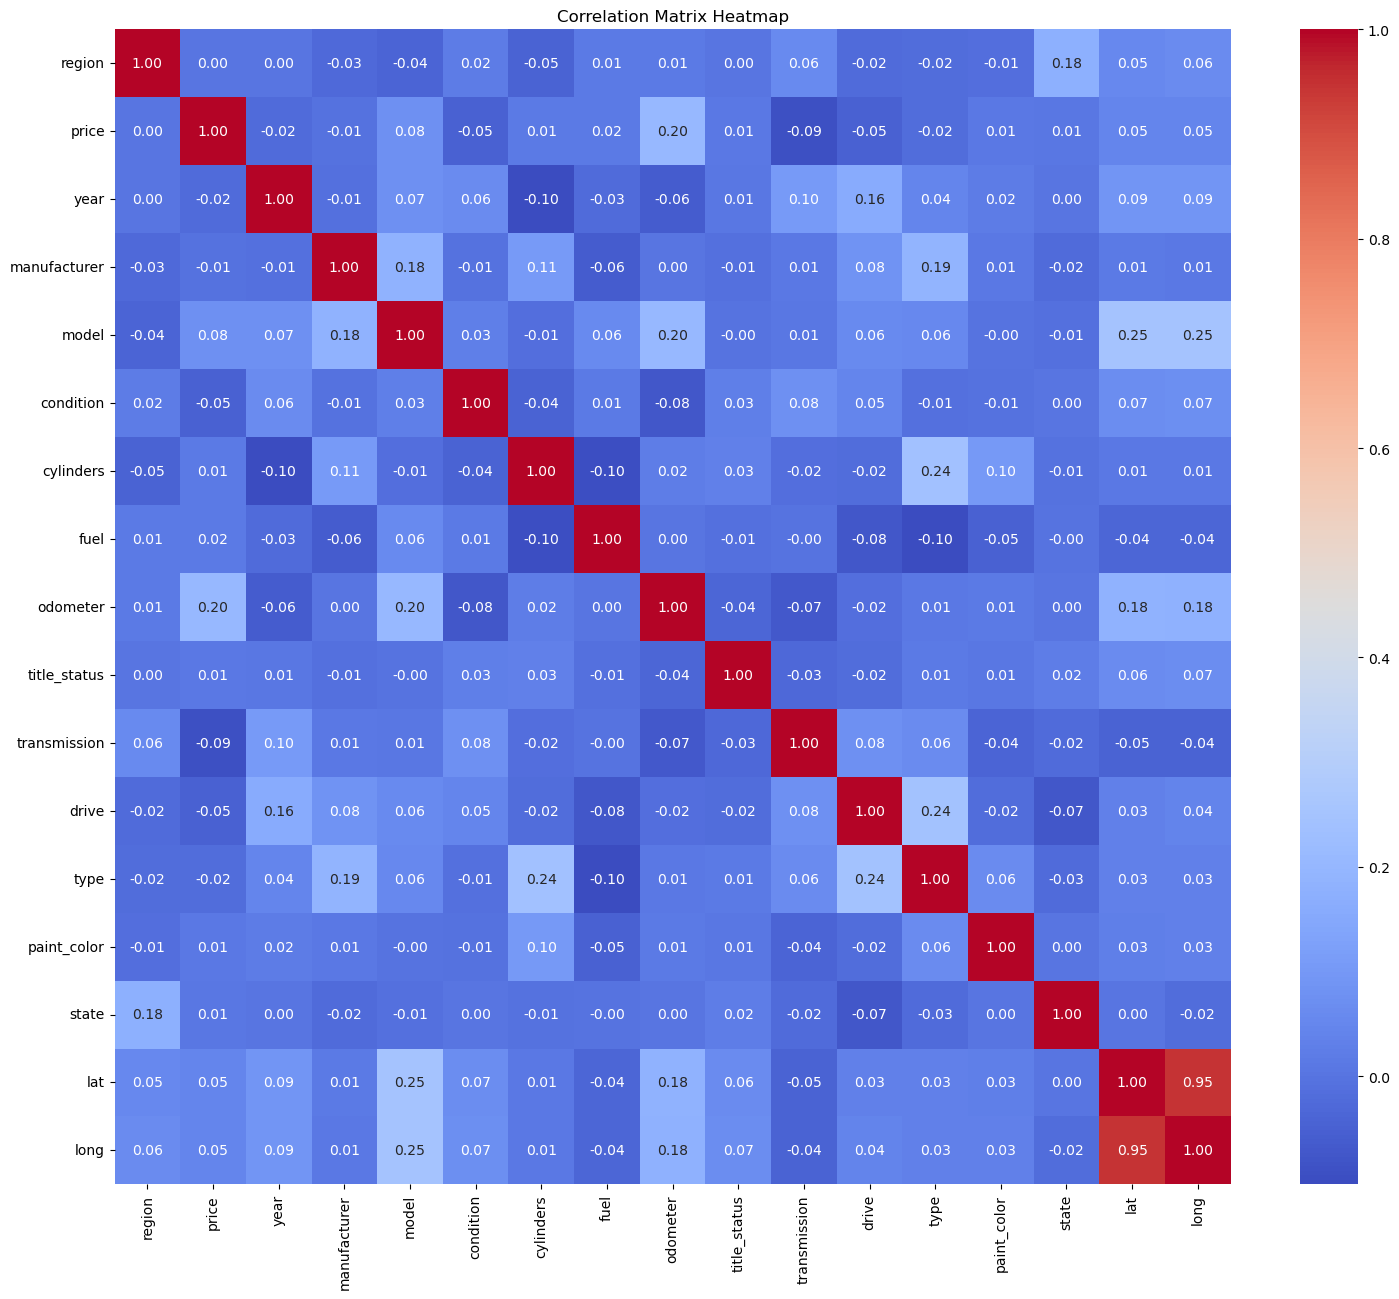

In [74]:
# generate heat matrix for the encoded dataframe
plt.figure(figsize=(18, 15))
corr_mat = df_factorized.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt='.2f')  # generate heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

# Unsupervised Learning Algorithms

### Several unsupervised learning algorithms and dimensionality reduction techniques will be performed on the data.

### Algorithms:

1. K-Means: A distance-based clustering algorithm that partitions data into a predefined number of clusters by iteratively assigning data points to the nearest cluster centroid and recalculating centroids until they stabilize.

2. MiniBatch K-Means: A faster variant of K-Means that uses subsets of the dataset in each iteration to reduce computational cost, useful for large datasets.

3. Gaussian Mixture Modeling (GMM): A probabilistic model that assumes data points are generated from a mixture of Gaussian distributions, providing more flexible, soft-assignment clustering that can handle clusters of different shapes and sizes.

4. FAILED Algorithms: DBSCAN, Hierarchical Clustering, and UMAP due to curse of dimensionality.

### Dimensionality Reduction Techniques:

1. t-SNE: t-Distributed Stochastic Neighbor Embedding, a technique for visualizing high-dimensional data in two or three dimensions while preserving local structure.
3. PCA: Principal Component Analysis, a linear technique for reducing data dimensionality while retaining important information.

### Implementation and Visualization:

Finally, the models will be implemented and the results will be visualized using scatter plots to represent the clustered data points, and the Silhouette Score will be calculated to evaluate the quality of the clustering. Unfortunately, since the dataset lacks ground truth data points and is meant for training on historical data, the Adjusted Rand Index (ARI) score, which measures agreement between clustering results and true labels, cannot be computed. However, additional supervised learning techniques and train-test splitting can be utilized in future stages of the project.

# K Means

Prior to implementing all algorithms, a subsample of the dataframe (10% to be exact) will be used for this experiment. This is because I lack the computing power to perform the algorithms, plots, and tests such as Silhouette Score on the large data size. This will be a major limitation of the study and needs to be explored further with iterations of other subsamples with more computing power. Nonetheless, 11,544 samples will suffice as a good subsample for the model.

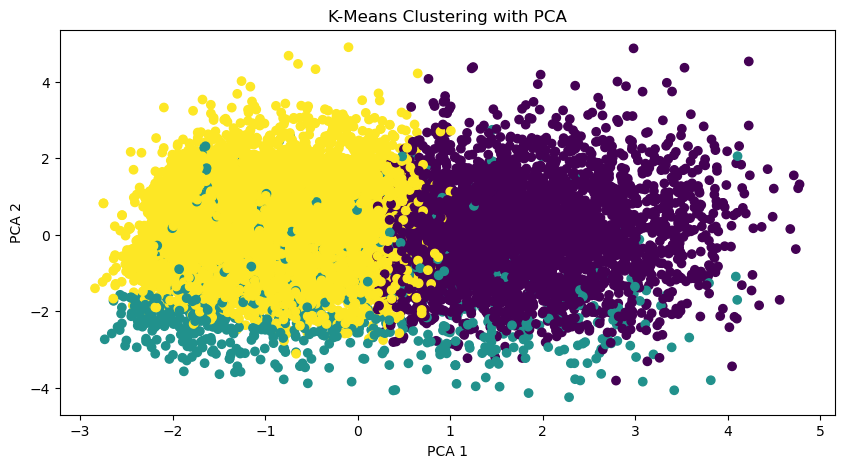

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

# Extract the features from the sampled dataframe
X_std = df_factorized.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
clusters = kmeans.fit_predict(X_std)

# Perform PCA for visualization purposes
pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of MiniBatchKMeans
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [76]:
# calculate silhouette score 
silhouette = metrics.silhouette_score(pca, clusters, metric='euclidean')
print("The silhouette score of the K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the K-Means Clustering solution: 0.3029


C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


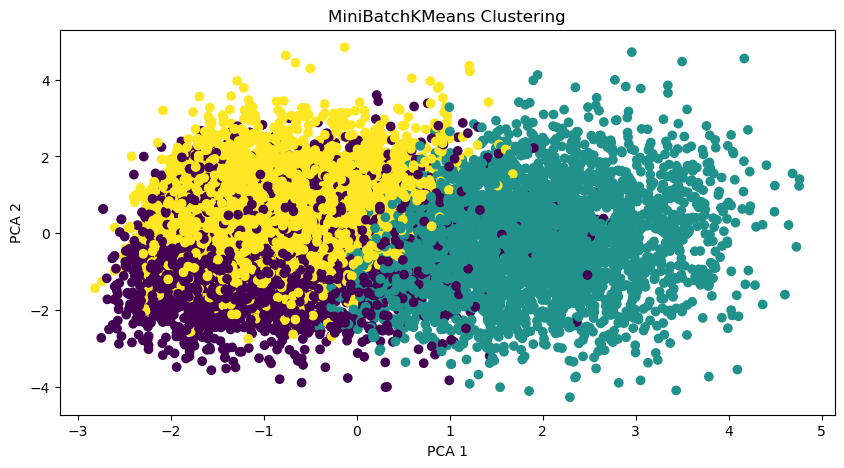

In [77]:
from sklearn.cluster import MiniBatchKMeans

# Define the features you want to include in the clustering
X_std = df_factorized.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

# Create MiniBatchKMeans object
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=5000)

# Fit and predict 
mbkmeans_clusters = minibatch_kmeans.fit_predict(X_std)

# Perform PCA for visualization purposes
pca = PCA(n_components=2).fit_transform(X_std)

# Plotting the results of MiniBatchKMeans
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=mbkmeans_clusters)
plt.title('MiniBatchKMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [78]:
silhouette = metrics.silhouette_score(pca, mbkmeans_clusters, metric='euclidean')
print("The silhouette score of the MiniBatch K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the MiniBatch K-Means Clustering solution: 0.1979


# Gaussian Mixture Modeling

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11544 samples in 0.002s...
[t-SNE] Computed neighbors for 11544 samples in 0.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11544
[t-SNE] Computed conditional probabilities for sample 2000 / 11544
[t-SNE] Computed conditional probabilities for sample 3000 / 11544
[t-SNE] Computed conditional probabilities for sample 4000 / 11544
[t-SNE] Computed conditional probabilities for sample 5000 / 11544
[t-SNE] Computed conditional probabilities for sample 6000 / 11544
[t-SNE] Computed conditional probabilities for sample 7000 / 11544
[t-SNE] Computed conditional probabilities for sample 8000 / 11544
[t-SNE] Computed conditional probabilities for sample 9000 / 11544
[t-SNE] Computed conditional probabilities for sample 10000 / 11544
[t-SNE] Computed conditional probabilities for sample 11000 / 11544
[t-SNE] Computed conditional probabilities for sample 11544 / 11544
[t-SNE] Mean sigma: 1.122089
[t-SNE] KL divergenc

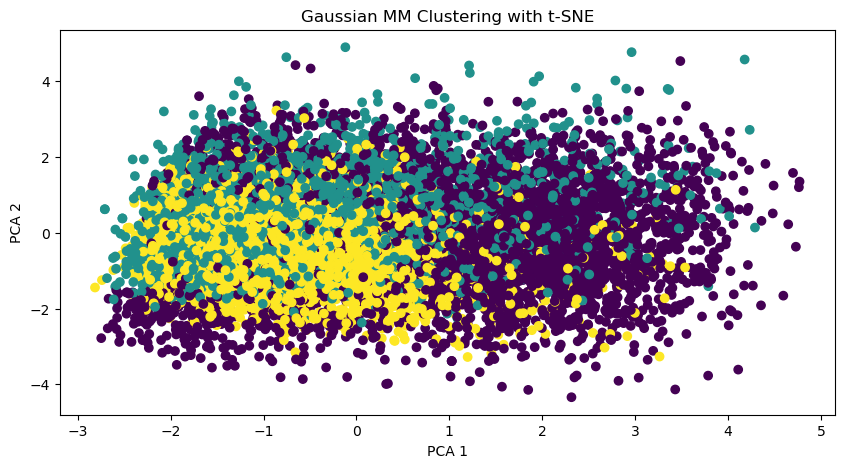

In [79]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

# Define the features you want to include in the clustering
X_std = df_factorized.values

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_std)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

# Define the GMM
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(tsne_results)

pca = PCA(n_components=2).fit_transform(X_std)

# Plot the results of GMM
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=clusters)
plt.title('Gaussian MM Clustering with t-SNE')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11544 samples in 0.001s...
[t-SNE] Computed neighbors for 11544 samples in 0.423s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11544
[t-SNE] Computed conditional probabilities for sample 2000 / 11544
[t-SNE] Computed conditional probabilities for sample 3000 / 11544
[t-SNE] Computed conditional probabilities for sample 4000 / 11544
[t-SNE] Computed conditional probabilities for sample 5000 / 11544
[t-SNE] Computed conditional probabilities for sample 6000 / 11544
[t-SNE] Computed conditional probabilities for sample 7000 / 11544
[t-SNE] Computed conditional probabilities for sample 8000 / 11544
[t-SNE] Computed conditional probabilities for sample 9000 / 11544
[t-SNE] Computed conditional probabilities for sample 10000 / 11544
[t-SNE] Computed conditional probabilities for sample 11000 / 11544
[t-SNE] Computed conditional probabilities for sample 11544 / 11544
[t-SNE] Mean sigma: 1.074180
[t-SNE] KL divergence

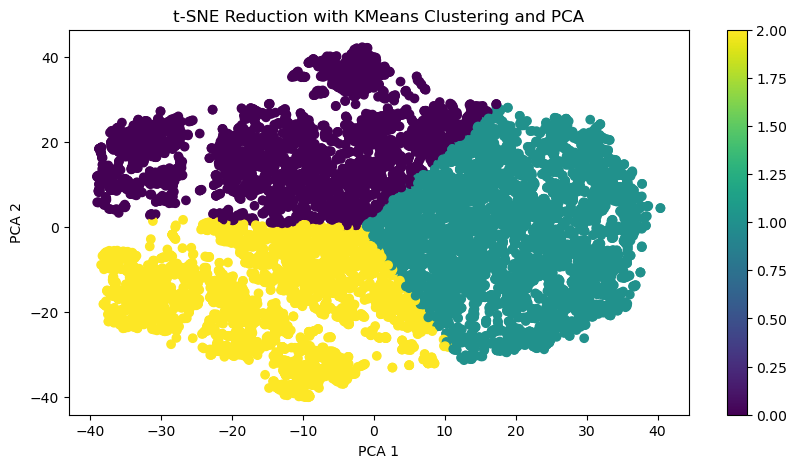

In [80]:
from sklearn.manifold import TSNE

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_factorized)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results = tsne.fit_transform(X_std)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)
clusters = kmeans.fit_predict(tsne_results)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tsne_results)

# Plot the results of t-SNE with color based on cluster assignments
plt.figure(figsize=(10, 5))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=clusters)
plt.title('t-SNE Reduction with KMeans Clustering and PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()  
plt.show()

In [81]:
silhouette = metrics.silhouette_score(pca_results, clusters, metric='euclidean')
print("The silhouette score of the t-SNE and K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the t-SNE and K-Means Clustering solution: 0.3906


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11544 samples in 0.001s...
[t-SNE] Computed neighbors for 11544 samples in 0.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11544
[t-SNE] Computed conditional probabilities for sample 2000 / 11544
[t-SNE] Computed conditional probabilities for sample 3000 / 11544
[t-SNE] Computed conditional probabilities for sample 4000 / 11544
[t-SNE] Computed conditional probabilities for sample 5000 / 11544
[t-SNE] Computed conditional probabilities for sample 6000 / 11544
[t-SNE] Computed conditional probabilities for sample 7000 / 11544
[t-SNE] Computed conditional probabilities for sample 8000 / 11544
[t-SNE] Computed conditional probabilities for sample 9000 / 11544
[t-SNE] Computed conditional probabilities for sample 10000 / 11544
[t-SNE] Computed conditional probabilities for sample 11000 / 11544
[t-SNE] Computed conditional probabilities for sample 11544 / 11544
[t-SNE] Mean sigma: 1.074180
[t-SNE] KL divergence

C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jody\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


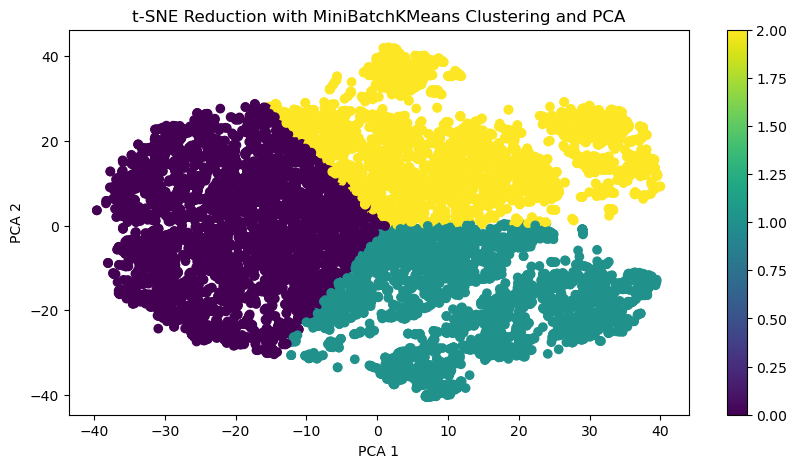

In [82]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_factorized)

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results = tsne.fit_transform(X_std)

# Perform clustering on t-SNE results
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1000)
clusters = minibatch_kmeans.fit_predict(tsne_results)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tsne_results)

# Plotting the results of t-SNE with color based on cluster assignments
plt.figure(figsize=(10, 5))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=clusters)
plt.title('t-SNE Reduction with MiniBatchKMeans Clustering and PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()  # Add a colorbar to show the mapping of cluster assignments
plt.show()

In [83]:
silhouette = metrics.silhouette_score(pca_results, clusters, metric='euclidean')
print("The silhouette score of the t-SNE and MiniBatch K-Means Clustering solution: {:.4f}".format(silhouette))

The silhouette score of the t-SNE and MiniBatch K-Means Clustering solution: 0.3943


#### INSIGHT:

Both the MiniBatch K-Means and traditional K-Means algorithms, paired with t-SNE and PCA reduction, resulted in three distinct clusters. The minimal silhouette score difference (0.0002) indicates nearly identical outcomes.

However, considering the large dataset, the MiniBatch K-Means method is the better choice. It efficiently manages computational resources by using subsets of samples in each iteration, making it more suitable for large datasets.

#### Therefore, I recommend the MiniBatch K-Means method with TSNE and PCA reduction. This strategy provides an optimal balance between computational efficiency and clustering quality, enabling us to effectively interpret and respond to the findings.

### Best Algorithm = MiniBatch K-means with TSNE and PCA Reduction

In [84]:
# calculate sample count for each cluster
unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)
print("Cluster Counts:")
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster Counts:
Cluster 0: 4515 data points
Cluster 1: 3449 data points
Cluster 2: 3580 data points


In [85]:
# Add the cluster assignments to the original DataFrame
sample_df['Cluster'] = clusters

# Subset data points for each cluster
cluster_0_df = sample_df[sample_df['Cluster'] == 0]
cluster_1_df = sample_df[sample_df['Cluster'] == 1]
cluster_2_df = sample_df[sample_df['Cluster'] == 2]

In [86]:
cluster_0_df.describe()

,price,year,odometer,lat,long,Cluster
count,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.0
mean,12993.861351,2010.683721,116697.481949,39.216912,-92.837750,0.0
std,10808.301796,5.783924,57263.231037,4.985914,17.929454,0.0
min,0.000000,1972.000000,200.000000,26.093111,-149.857916,0.0
25%,5495.000000,2007.000000,77000.000000,36.006832,-104.803653,0.0
50%,9800.000000,2012.000000,114000.000000,39.998000,-87.040472,0.0
75%,17750.000000,2015.000000,152381.500000,42.677719,-79.951848,0.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,0.0


In [87]:
cluster_1_df.describe()

,price,year,odometer,lat,long,Cluster
count,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.0
mean,18871.305596,2007.819078,81634.974195,37.358906,-92.153258,1.0
std,13748.852888,14.212416,63284.103867,5.080994,16.895029,0.0
min,0.000000,1913.000000,200.000000,26.093111,-149.857916,1.0
25%,6700.000000,2005.000000,29010.000000,33.786500,-99.955100,1.0
50%,15991.000000,2012.000000,70760.000000,38.159627,-85.697708,1.0
75%,30000.000000,2017.000000,121911.000000,41.310000,-80.339826,1.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,1.0


In [88]:
cluster_2_df.describe()

,price,year,odometer,lat,long,Cluster
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.0
mean,14465.147207,2009.520670,111957.055028,38.304592,-92.554815,2.0
std,13034.526934,8.038387,63138.495686,5.165069,16.880725,0.0
min,0.000000,1929.000000,200.000000,26.093111,-149.857916,2.0
25%,5500.000000,2006.000000,65982.500000,34.780575,-104.860825,2.0
50%,9900.000000,2011.000000,108776.000000,39.265068,-86.575773,2.0
75%,19000.000000,2015.000000,152856.000000,42.177067,-79.956026,2.0
max,55000.000000,2021.000000,283000.000000,48.698726,-71.029671,2.0


In [89]:
# Calculate the mean values for each column within each cluster
cluster_0_means = cluster_0_df.mean()
cluster_1_means = cluster_1_df.mean()
cluster_2_means = cluster_2_df.mean()

# Create a DataFrame to compare the means
means_comparison_df = pd.DataFrame({'Cluster 0': cluster_0_means,
                                    'Cluster 1': cluster_1_means,
                                    'Cluster 2': cluster_2_means})

# Display the means comparison DataFrame
print("Means Comparison:")
print(means_comparison_df)

Means Comparison:
              Cluster 0     Cluster 1      Cluster 2
price      12993.861351  18871.305596   14465.147207
year        2010.683721   2007.819078    2009.520670
odometer  116697.481949  81634.974195  111957.055028
lat           39.216912     37.358906      38.304592
long         -92.837750    -92.153258     -92.554815
Cluster        0.000000      1.000000       2.000000


C:\Users\Jody\AppData\Local\Temp\ipykernel_17064\3531021815.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_0_means = cluster_0_df.mean()
C:\Users\Jody\AppData\Local\Temp\ipykernel_17064\3531021815.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_1_means = cluster_1_df.mean()
C:\Users\Jody\AppData\Local\Temp\ipykernel_17064\3531021815.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_2_means = cluster_2_df.mean()


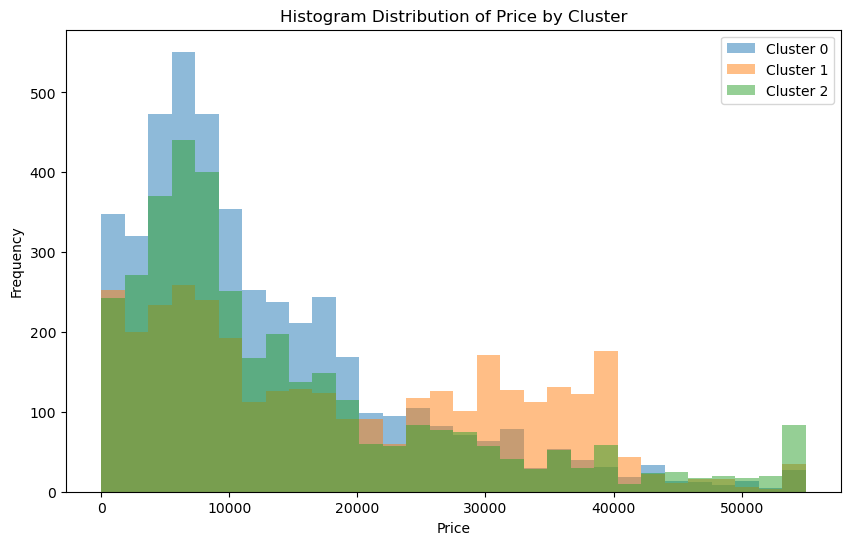

In [90]:
# Set figure size
plt.figure(figsize=(10, 6))

# Generate histogram plots for each cluster
plt.hist(cluster_0_df['price'], bins=30, alpha=0.5, label='Cluster 0')
plt.hist(cluster_1_df['price'], bins=30, alpha=0.5, label='Cluster 1')
plt.hist(cluster_2_df['price'], bins=30, alpha=0.5, label='Cluster 2')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Price by Cluster')
plt.legend()
plt.show()

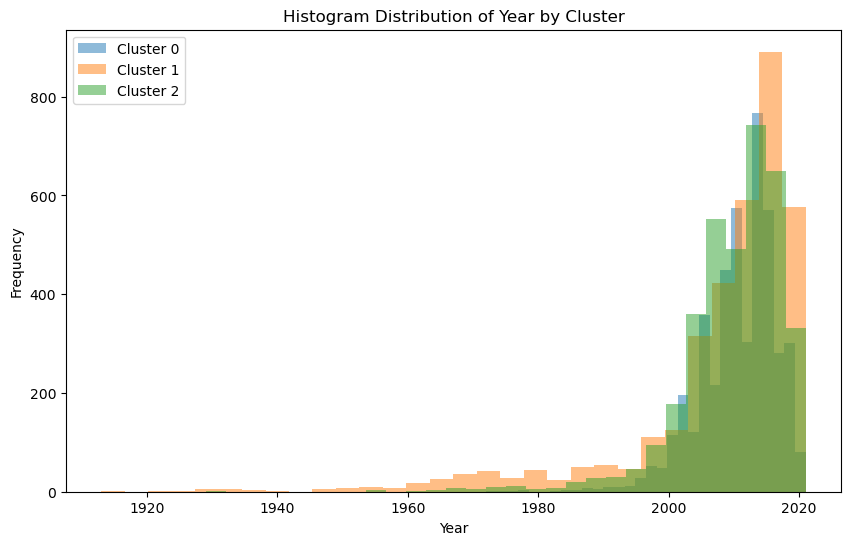

In [91]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Generate histogram plots for each cluster
plt.hist(cluster_0_df['year'], bins=30, alpha=0.5, label='Cluster 0')
plt.hist(cluster_1_df['year'], bins=30, alpha=0.5, label='Cluster 1')
plt.hist(cluster_2_df['year'], bins=30, alpha=0.5, label='Cluster 2')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Year by Cluster')
plt.legend()
plt.show()

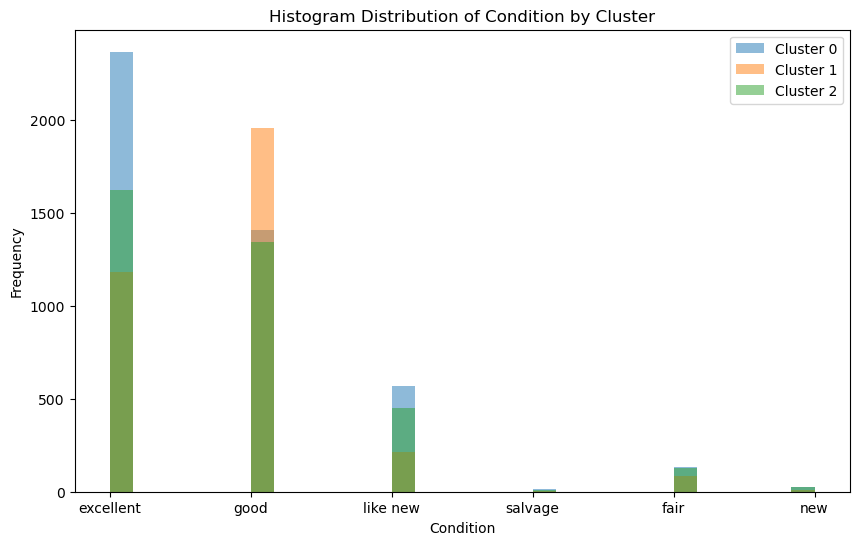

In [92]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Generate histogram plots for each cluster
plt.hist(cluster_0_df['condition'], bins=30, alpha=0.5, label='Cluster 0')
plt.hist(cluster_1_df['condition'], bins=30, alpha=0.5, label='Cluster 1')
plt.hist(cluster_2_df['condition'], bins=30, alpha=0.5, label='Cluster 2')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Condition by Cluster')
plt.legend()
plt.show()

### Conclusion: 
    
This research study successfully applied a range of unsupervised machine learning techniques to a substantial dataset of US car sales from 2021. Through meticulous data preprocessing, we refined the dataset to 17 salient parameters and proceeded with the segmentation and clustering of a 10% subsample. The experiments employed various clustering algorithms and dimensionality reduction techniques, with the t-SNE reduced MiniBatch K-Means algorithm yielding the most promising results. The model produced a Silhouette score of 0.39, indicative of effective data segmentation. Further, the optimal number of data clusters was 3, providing a nuanced understanding of the US car market segments.

The segments (clusters) established by the model produced different mean results for year, price, odometer, and condition. All four of these features proved to be important to the model, amongst others. However, due to computational limitations, the application of the model to the full dataset is a matter for future exploration.

This study significantly contributes to the understanding of US car sales data, which can be leveraged to shape strategic decisions in the automotive industry, specifically the condition and values of used cars. The research underscores the potential of unsupervised learning methods in deriving meaningful insights from large-scale datasets, pointing the way for future research to continue advancing this promising line of inquiry. In particular, the segmentated clusters generated by the unsupervised learning algorithm and added into the dataframe has the potential to enhance future models of prediction and classification.